In [1]:
import pandas as pd

In [2]:
brd4_df = pd.read_parquet("../data/brd4_5p.parquet")

In [3]:
brd4_df.head()

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
0,221249733,O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,CC1CCCC(CN)O1,NCC1CS(=O)(=O)c2ccccc21,CC1CCCC(CNc2nc(NCC3CS(=O)(=O)c4ccccc43)nc(Nc3c...,BRD4,0
1,221249736,O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,CC1CCCC(CN)O1,NCC1CSCCN1Cc1ccccc1,CC1CCCC(CNc2nc(NCC3CSCCN3Cc3ccccc3)nc(Nc3cnccc...,BRD4,0
2,221249880,O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,CC1CCCC(CN)O1,NCc1nccs1,CC1CCCC(CNc2nc(NCc3nccs3)nc(Nc3cnccc3C(=O)N[Dy...,BRD4,0
3,221250369,O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,CC1CN(S(=O)(=O)CCN)CC(C)O1,CC(C)NC(=O)NCCN.Cl.Cl,CC(C)NC(=O)NCCNc1nc(NCCS(=O)(=O)N2CC(C)OC(C)C2...,BRD4,0
4,221250546,O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,CC1CN(S(=O)(=O)CCN)CC(C)O1,CN1CC(CN)CC1=O,CC1CN(S(=O)(=O)CCNc2nc(NCC3CC(=O)N(C)C3)nc(Nc3...,BRD4,0


In [4]:
brd4_df.nunique()

id                       983457
buildingblock1_smiles       271
buildingblock2_smiles       693
buildingblock3_smiles       872
molecule_smiles          983457
protein_name                  1
binds                         2
dtype: int64

In [8]:
brd4_df.head()

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds,bb1_encoded,bb2_encoded,bb3_encoded
0,221249733,O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,CC1CCCC(CN)O1,NCC1CS(=O)(=O)c2ccccc21,CC1CCCC(CNc2nc(NCC3CS(=O)(=O)c4ccccc43)nc(Nc3c...,BRD4,0,0,0,0
1,221249736,O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,CC1CCCC(CN)O1,NCC1CSCCN1Cc1ccccc1,CC1CCCC(CNc2nc(NCC3CSCCN3Cc3ccccc3)nc(Nc3cnccc...,BRD4,0,0,0,1
2,221249880,O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,CC1CCCC(CN)O1,NCc1nccs1,CC1CCCC(CNc2nc(NCc3nccs3)nc(Nc3cnccc3C(=O)N[Dy...,BRD4,0,0,0,2
3,221250369,O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,CC1CN(S(=O)(=O)CCN)CC(C)O1,CC(C)NC(=O)NCCN.Cl.Cl,CC(C)NC(=O)NCCNc1nc(NCCS(=O)(=O)N2CC(C)OC(C)C2...,BRD4,0,0,1,3
4,221250546,O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,CC1CN(S(=O)(=O)CCN)CC(C)O1,CN1CC(CN)CC1=O,CC1CN(S(=O)(=O)CCNc2nc(NCC3CC(=O)N(C)C3)nc(Nc3...,BRD4,0,0,1,4


In [76]:
from rdkit import Chem

#Get mol from dataframe
buildingblock_columns = ['buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles', 'molecule_smiles']

def get_all_molecules(row):
    for col in buildingblock_columns:
        m = Chem.MolFromSmiles(brd4_df.loc[row,col])
        display(m)


In [75]:
import re

for index in brd4_df.index:
    brd4_df.at[index, 'buildingblock1_smiles'] = brd4_df.at[index, 'buildingblock1_smiles'].replace('CC1c2ccccc2-c2ccccc21', '')

brd4_df.head(1)

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds,bb1_encoded,bb2_encoded,bb3_encoded
0,221249733,O=C(Nc1cnccc1C(=O)O)O,CC1CCCC(CN)O1,NCC1CS(=O)(=O)c2ccccc21,CC1CCCC(CNc2nc(NCC3CS(=O)(=O)c4ccccc43)nc(Nc3c...,BRD4,0,0,0,0


In [78]:
bb1_smiles = {y:x for x,y in enumerate(brd4_df.buildingblock1_smiles.unique())}
bb2_smiles = {y:x for x,y in enumerate(brd4_df.buildingblock2_smiles.unique())}
bb3_smiles = {y:x for x,y in enumerate(brd4_df.buildingblock3_smiles.unique())}

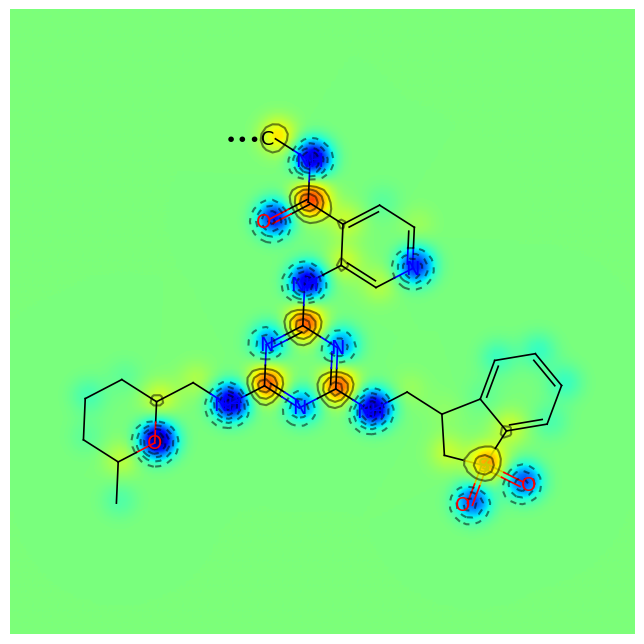

In [100]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import AllChem

def draw_gasteiger(row):
    mol = Chem.MolFromSmiles(brd4_df.loc[row,'molecule_smiles'].replace('Dy', 'C'))
    AllChem.ComputeGasteigerCharges(mol)
    contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
    fig =  SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)
    return fig

draw_gasteiger(0);

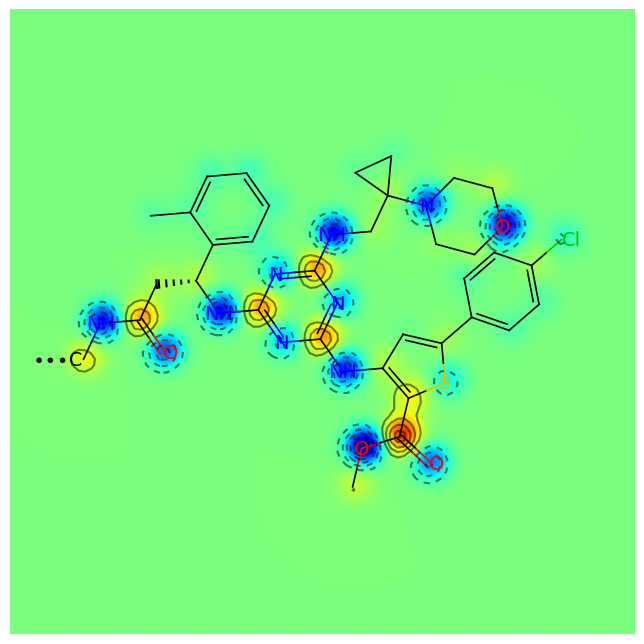

In [109]:
draw_gasteiger(456123);

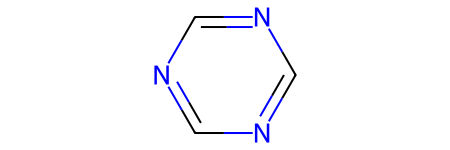

In [119]:
from rdkit import Chem
template = Chem.MolFromSmiles('C1=NC=NC=N1')
template


In [131]:
query = Chem.MolFromSmiles(brd4_df.molecule_smiles[4564].replace('Dy', 'C'))
query

from rdkit.Chem import rdFMCS
mcs = rdFMCS.FindMCS([template, query])
patt = Chem.MolFromSmarts(mcs.smartsString)

query_match = query.GetSubstructMatch(patt)
template_match = template.GetSubstructMatch(patt)

from rdkit.Chem import AllChem
AllChem.Compute2DCoords(query)
rms = AllChem.AlignMol(query, template, atomMap=list(zip(query_match,template_match)))

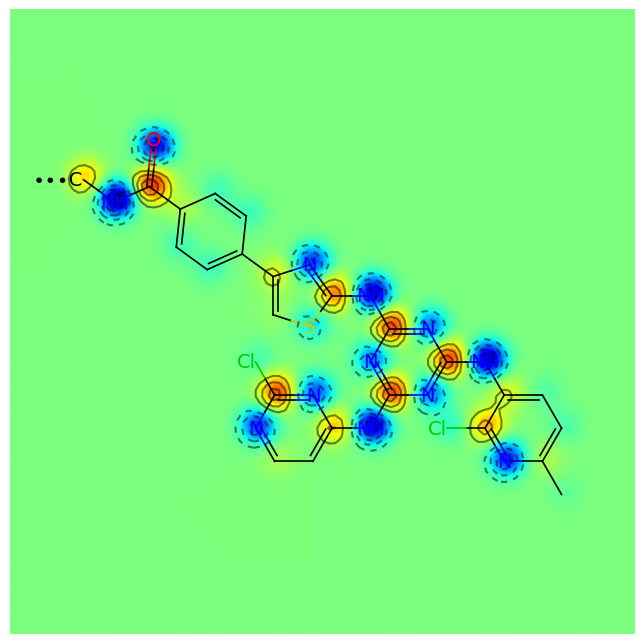

In [132]:
AllChem.ComputeGasteigerCharges(query)
contribs = [query.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(query.GetNumAtoms())]
fig =  SimilarityMaps.GetSimilarityMapFromWeights(query, contribs, colorMap='jet', contourLines=10)


In [103]:
from rdkit.Chem import rdMolDescriptors
contribs2 = rdMolDescriptors._CalcCrippenContribs(Chem.MolFromSmiles(brd4_df.loc[1,'molecule_smiles'].replace('Dy', 'C')))
contribs2

#fig = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs2], colorMap='jet', contourLines=10)

[(0.1441, 2.503),
 (-0.2051, 2.731),
 (0.1441, 2.503),
 (0.1441, 2.503),
 (0.1441, 2.503),
 (-0.2051, 2.731),
 (-0.2035, 2.753),
 (-0.5188, 3.0),
 (0.4619, 4.067),
 (-0.3239, 2.202),
 (0.4619, 4.067),
 (-0.5188, 3.0),
 (-0.2035, 2.753),
 (-0.2051, 2.731),
 (-0.2035, 2.753),
 (0.6482, 7.591),
 (-0.2035, 2.753),
 (-0.2035, 2.753),
 (-0.3187, 1.839),
 (-0.0516, 2.488),
 (0.136, 3.509),
 (0.1581, 3.35),
 (0.1581, 3.35),
 (0.1581, 3.35),
 (0.1581, 3.35),
 (0.1581, 3.35),
 (-0.3239, 2.202),
 (0.4619, 4.067),
 (-0.5188, 3.0),
 (0.4619, 4.067),
 (0.1581, 3.35),
 (-0.3239, 2.202),
 (0.1581, 3.35),
 (0.1581, 3.35),
 (0.136, 3.509),
 (-0.2783, 5.007),
 (0.1129, 0.2215),
 (-0.7096, 2.173),
 (0.08129, 3.243),
 (-0.3239, 2.202),
 (-0.0684, 1.085)]